Back in the day, a lot of people tried to guess the value of pi. But they couldn't do it because it's really hard.

Finally, some french guys tried throwing needles and a circle and a square and getting the ratio of needles that landed in the circle and the ratio that landed in the square. Which is pretty much bascially a Monte Carlo Simulation. Let's recreate that asap.

In [ ]:
import pylab

But actually, first let's format the pylab graph.

In [ ]:
#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers, e.g., circles representing points
pylab.rcParams['lines.markersize'] = 10
#set number of times marker is shown when displaying legend
pylab.rcParams['legend.numpoints'] = 1

Aight, let's hit it. Import modules.

In [14]:
import random, numpy, math

### throwNeedles

throwNeedles takes in a number of needles `numNeedels`, simulates throwing them at a circle with a radius of 1 and counts the needles that land in the circle bounds.

For each needle, a random value between 0 and 1 are assigned to `x` and `y`.
The if statement uses the pythagorean theorem to check if the needles land in the circle.
the returned ratio is multiplied by four, because the above simulation only threw needles at the first quadrant.

In [15]:
def throwNeedles(numNeedles):
    inCircle = 0
    for Needles in range(1, numNeedles + 1, 1):
        x = random.random()
        y = random.random()
        if (x*x + y*y)**0.5 <= 1.0:
            inCircle += 1
    return 4*(inCircle/float(numNeedles))

### getEst

`getEst` runs `throwNeedles` for a number `numTrials` times. Each rariud approximation is appneded to `estimates`.
Looks like standard deviation doesn't even need to be hand calculated. You can just use numpy on an iterable.
The mean estimate is bound to`curEst`. The mean, std deviation and total number of needels are printed out. `curEst` and`sDev` are returned as a tuple.

In [16]:
def getEst(numNeedles, numTrials):
    estimates = []
    for t in range(numTrials):
        piGuess = throwNeedles(numNeedles)
        estimates.append(piGuess)
    sDev = numpy.std(estimates)
    curEst = sum(estimates)/len(estimates)
    print('Est. = ' + str(curEst) +\
          ', Std. dev. = ' + str(round(sDev, 6))\
          + ', Needles = ' + str(numNeedles))
    return (curEst, sDev)

### estPi

`estimatePi` takes in `precision`, which is a degree of precision which must be met and `numtrials`.

`numNeedles` is set within the function. `sDev` is set to equal precision.

The while loop runs `getEst` and increases the needles count quadratically, until there are enough needles thrown in a single trial that the standard deviation is less than precision divided by 1.96...

Sadly, I forgot stat so hard idk what this means.

In [17]:
def estPi(precision, numTrials):
    numNeedles = 1000
    sDev = precision
    while sDev >= precision/1.96:
        curEst, sDev = getEst(numNeedles, numTrials)
        numNeedles *= 2
    return curEst

### call `EstPi()`

In [18]:
random.seed(0)
estPi(0.005, 100)

Est. = 3.1484400000000012, Std. dev. = 0.047886, Needles = 1000
Est. = 3.1391799999999987, Std. dev. = 0.035495, Needles = 2000
Est. = 3.1410799999999997, Std. dev. = 0.02713, Needles = 4000
Est. = 3.141435, Std. dev. = 0.016805, Needles = 8000
Est. = 3.141355, Std. dev. = 0.0137, Needles = 16000
Est. = 3.1413137500000006, Std. dev. = 0.008476, Needles = 32000
Est. = 3.141171874999999, Std. dev. = 0.007028, Needles = 64000
Est. = 3.1415896874999993, Std. dev. = 0.004035, Needles = 128000
Est. = 3.1417414062499995, Std. dev. = 0.003536, Needles = 256000
Est. = 3.14155671875, Std. dev. = 0.002101, Needles = 512000


3.14155671875

### integrate

idk about integrals, no need to dick with this too hard.

In [19]:
def integrate(f, a, b, step):
    yVals, xVals = [], []
    xVal = a
    while xVal <= b:
        xVals.append(xVal)
        yVals.append(f(xVal))
        xVal += step
    pylab.plot(xVals, yVals)
    pylab.title('sin(x)')
    pylab.xlim(a, b)
    xUnders, yUnders, xOvers, yOvers = [],[],[],[]
    for i in range(500):
        xVal = random.uniform(a, b)
        yVal = random.uniform(0, 1)
        if yVal < f(xVal):
            xUnders.append(xVal)
            yUnders.append(yVal)
        else:
            xOvers.append(xVal)
            yOvers.append(yVal)
    pylab.plot(xUnders, yUnders, 'ro')
    pylab.plot(xOvers, yOvers, 'ko')
    pylab.xlim(a, b)
    ratio = len(xUnders)/(len(xUnders) + len(yUnders))
    print(ratio)
    print(ratio*b)

### WTF??

In [20]:
def one(x):
    return 0.9

0.5
1.5707963267948966


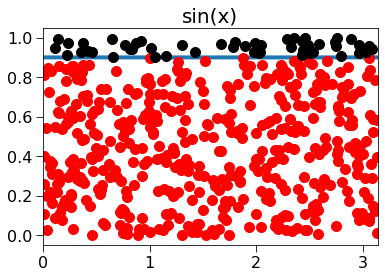

In [22]:
integrate(one, 0, math.pi, 0.001)